In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import os
import time

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from registration_utilities import *
from annotation_utilities import *
from metadata import *
from data_manager import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for Precision WorkStation


No vtk
No vtkNot using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


# Global

In [4]:
stack_m_spec = dict(name='atlasV5',
                   vol_type='score',
                   detector_id=None,
                   prep_id=None,
                   structure=None,
                   resolution='down32')

stack_f_spec = dict(name='MD642',
                   vol_type='score',
                   detector_id=13,
                   prep_id=2,
                   structure=None,
                   resolution='down32')

global_alignment_spec = dict(stack_m=stack_m_spec, 
                      stack_f=stack_f_spec,
                      warp_setting=20)

In [5]:
global_aligner_parameters = generate_aligner_parameters(alignment_spec=global_alignment_spec,
structures_m=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC']
# structures_m=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R']
)

upstream_warp_id                                               None
transform_type                                               affine
terminate_thresh                                                NaN
grad_computation_sample_number                                10000
grid_search_sample_number                                       NaN
std_tx_um                                                      2000
std_ty_um                                                      2000
std_tz_um                                                      2000
std_theta_xy_degree                                              30
surround_weight                                                 NaN
regularization_weight                                           NaN
comment                           global reg no surr no grid search
max_iter_num                                                    200
Name: 20, dtype: object
surround nan False


Prior structure/index map not found. Generating a new one.
Loaded moving volumes: ['10N_L', '10N_R', '12N', '3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'AP', 'Amb_L', 'Amb_R', 'DC_L', 'DC_R', 'IC', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'PBG_L', 'PBG_R', 'Pn_L', 'Pn_R', 'RMC_L', 'RMC_R', 'SC', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', 'Tz_L', 'Tz_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'VLL_L', 'VLL_R'].
Prior structure/index map not found. Generating a new one.
Loaded fixed volumes: ['10N', '12N', '3N', '4N', '5N', '6N', '7N', '7n', 'AP', 'Amb', 'DC', 'IC', 'LC', 'LRt', 'PBG', 'Pn', 'RMC', 'SC', 'SNC', 'SNR', 'Sp5C', 'Tz', 'VCA', 'VCP', 'VLL'].


In [5]:
volume_fixed = global_aligner_parameters['volume_fixed']
volume_moving = global_aligner_parameters['volume_moving']

In [16]:
from registration_utilities import *

In [6]:
aligner = Aligner4(volume_fixed, volume_moving, labelIndexMap_m2f=global_aligner_parameters['label_mapping_m2f'])

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


In [7]:
# aligner.set_centroid(centroid_m='origin', centroid_f='origin')
# aligner.set_centroid(centroid_m='volume_centroid', centroid_f='centroid_m')
aligner.set_centroid(centroid_m='volume_centroid', centroid_f='volume_centroid')
# aligner.set_centroid(centroid_m='structure_centroid', centroid_f='structure_centroid', 
#                      indices_m=[aligner_parameters['structure_to_label_moving']['7N']])
# Sometimes initialize with SNR_L centers results in zero gradient. In those cases use another structure.

centroid_m: [ 233.   197.   206.5], centroid_f: [ 448.5  243.5  194. ]


In [8]:
aligner.set_label_weights(label_weights=global_aligner_parameters['label_weights_m'])

In [11]:
# If no any structures overlap after centroid alignment, we need to do grid search to obtain a better initial transform.
grid_search_T, grid_search_score = aligner.do_grid_search(grid_search_iteration_number=1, 
                                       grid_search_sample_number=5,
                    parallel=True, 
                    std_tx=50, std_ty=50, std_tz=30)

sigma_tx: 50.00 (voxel), sigma_ty: 50.00, sigma_tz: 30.00, sigma_theta_xy: 30.00 (deg), n:5
grid search: 8.667571 seconds
tx_best: -50.00 (voxel), ty_best: -50.00, tz_best: 0.00, theta_xy_best: 0.00 (deg), score=0.225788
New best: -inf 0.225788
params_best_upToNow: -50.000000 -50.000000 0.000000 0.000000


In [9]:
gradients_f = compute_gradient(volume_fixed, smooth_first=True)
aligner.load_gradient(gradients=gradients_f)

indices_f: set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


In [12]:
# Tuning learning rate:
# lr1=10., if lucky converges much faster than lr1=1., but sometimes stuck in local maxima
# If lr1=1., grad_computation_sample_number=1e5 is sufficient.

trial_num = 1

T_all_trials = []
scores_all_trials = []
traj_all_trials = []

for _ in range(trial_num):

    try:
        T, scores = aligner.optimize(tf_type=global_aligner_parameters['transform_type'], 
                                     max_iter_num=100,
                                     history_len=20, 
                                     terminate_thresh_rot=.001,
                                     terminate_thresh_trans=.1,
                                     grad_computation_sample_number=global_aligner_parameters['grad_computation_sample_number'],
                                     lr1=10, lr2=.1,
                                    init_T=grid_search_T, 
                                     affine_scaling_limits=(.9, 1.2)
                                    )
        T_all_trials.append(T)
        scores_all_trials.append(scores)
        traj_all_trials.append(aligner.Ts)
        
    except Exception as e:
        sys.stderr.write('%s\n' % e)


iteration 0
Norm of gradient = 3.464102
in T: -50.00 -50.00 0.00, out T: -60.00 -60.00 10.00
step: 0.29 seconds
current score: -2.332631
new_T: [-60. -60.  10.]
det: 0.86

iteration 1
Norm of gradient = 2.498517
in T: -60.00 -60.00 10.00, out T: -55.23 -55.82 0.68
step: 0.28 seconds
current score: -2.333070
new_T: [-55.2327759  -55.82153363   0.68328546]
det: 0.82

iteration 2
Norm of gradient = 1.438369
in T: -55.23 -55.82 0.68, out T: -50.02 -51.91 1.79
step: 0.26 seconds
current score: -2.331614
new_T: [-50.02122572 -51.90899202   1.78833743]
det: 0.80

iteration 3
Norm of gradient = 1.237313
in T: -50.02 -51.91 1.79, out T: -55.64 -53.39 3.64
step: 0.26 seconds
current score: -2.331216
new_T: [-55.64311809 -53.38850195   3.64009931]
det: 0.76

iteration 4
Norm of gradient = 1.266837
in T: -55.64 -53.39 3.64, out T: -51.79 -49.25 0.72
step: 0.26 seconds
current score: -2.331009
new_T: [-51.78850414 -49.24884749   0.71979566]
det: 0.81

iteration 5
Norm of gradient = 1.596315
in T: 

Norm of gradient = 0.390534
in T: -50.00 -60.54 2.98, out T: -50.72 -61.36 1.94
step: 0.26 seconds
current score: -2.329905
new_T: [-50.71945912 -61.36004523   1.94385158]
det: 0.93

iteration 43
Norm of gradient = 0.333156
in T: -50.72 -61.36 1.94, out T: -49.73 -60.78 3.48
step: 0.26 seconds
current score: -2.329961
new_T: [-49.73138521 -60.7810052    3.48100748]
det: 0.94

iteration 44
Norm of gradient = 0.242450
in T: -49.73 -60.78 3.48, out T: -50.47 -61.44 2.54
step: 0.26 seconds
current score: -2.329850
new_T: [-50.46988557 -61.44436158   2.54366641]
det: 0.93

iteration 45
Norm of gradient = 0.199161
in T: -50.47 -61.44 2.54, out T: -49.65 -61.27 3.40
step: 0.27 seconds
current score: -2.329928
new_T: [-49.64577277 -61.27249569   3.39536617]
det: 0.94

iteration 46
Norm of gradient = 0.248263
in T: -49.65 -61.27 3.40, out T: -49.98 -61.56 2.11
step: 0.27 seconds
current score: -2.329991
new_T: [-49.97843033 -61.55628935   2.10863334]
det: 0.94

iteration 47
Norm of gradient = 0

Norm of gradient = 0.152341
in T: -46.03 -63.87 5.20, out T: -46.12 -64.48 4.71
step: 0.26 seconds
current score: -2.330062
new_T: [-46.12497915 -64.48257611   4.71046161]
det: 0.95

iteration 85
Norm of gradient = 0.137836
in T: -46.12 -64.48 4.71, out T: -46.00 -64.22 4.99
step: 0.26 seconds
current score: -2.329941
new_T: [-46.00177428 -64.22120823   4.99312579]
det: 0.96

iteration 86
Norm of gradient = 0.127824
in T: -46.00 -64.22 4.99, out T: -46.25 -64.52 4.59
step: 0.26 seconds
current score: -2.330005
new_T: [-46.25335359 -64.51839353   4.59274558]
det: 0.96

iteration 87
Norm of gradient = 0.127035
in T: -46.25 -64.52 4.59, out T: -45.86 -64.18 5.06
step: 0.26 seconds
current score: -2.330015
new_T: [-45.86451511 -64.18068499   5.05543926]
det: 0.96

iteration 88
Norm of gradient = 0.109973
in T: -45.86 -64.18 5.06, out T: -46.15 -64.73 4.82
step: 0.26 seconds
current score: -2.329958
new_T: [-46.15318877 -64.72790252   4.82442845]
det: 0.95

iteration 89
Norm of gradient = 0

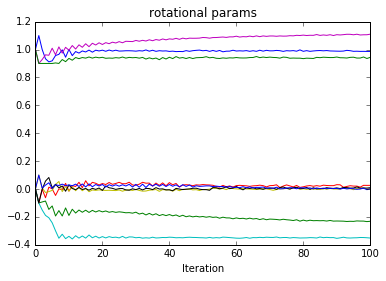

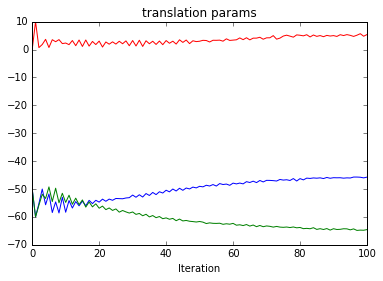

Best trial: 0
-2.32982254483 -2.33005605682
[[  9.89367451e-01  -1.73086923e-01   4.81706887e-02  -5.20633639e+01]
 [ -3.52426211e-01   1.06586620e+00  -1.54122771e-02  -5.87643970e+01]
 [ -6.79079173e-03   3.45235903e-02   9.43279940e-01   3.31120530e+00]]


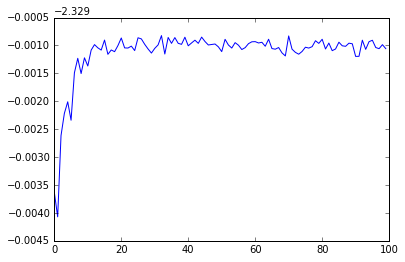

In [13]:
Ts = np.array(aligner.Ts)

plt.plot(Ts[:, [0,1,2,4,5,6,8,9,10]]);
plt.title('rotational params');
plt.xlabel('Iteration');
plt.show();

plt.plot(Ts[:, [3,7,11]]);
plt.title('translation params');
plt.xlabel('Iteration');
plt.show();

best_trial = np.argsort([np.max(scores) for scores in scores_all_trials])[-1]
# best_trial = 1
T = T_all_trials[best_trial]
scores = scores_all_trials[best_trial]
print 'Best trial:', best_trial
print max(scores), scores[-1]

print T.reshape((3,4))
plt.figure();
plt.plot(scores);
plt.show();

In [33]:
best_trial = 0

In [14]:
transform_parameters = {
    'parameters': T_all_trials[best_trial],
    'centroid_m': aligner.centroid_m,
    'centroid_f': aligner.centroid_f,
    'domain_m_origin_wrt_wholebrain': global_aligner_parameters['volume_moving_origin_wrt_wholebrain'],
    'domain_f_origin_wrt_wholebrain': global_aligner_parameters['volume_fixed_origin_wrt_wholebrain']
}

In [15]:
DataManager.save_alignment_results_v2(transform_parameters=transform_parameters,
                       score_traj=scores_all_trials[best_trial],
                       parameter_traj=traj_all_trials[best_trial],
                      alignment_spec=global_alignment_spec)

aws s3 cp "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_parameters.json"
aws s3 cp "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_scoreHistory.bp"
aws s3 cp "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_do

In [16]:
transform_parameters = DataManager.load_alignment_parameters_v3(alignment_spec=global_alignment_spec)

In [19]:
# volume_moving_tuples = \
#         DataManager.load_original_volume_all_known_structures_v2(stack='atlasV5', sided=True, 
#                                                               volume_type='score', 
#                                                               include_surround=True,
#                                                                 return_label_mappings=False, 
#                                                                  name_or_index_as_key='name',
#                                                                  common_shape=False,
#                                                                 in_bbox_wrt='atlasSpace',
#                                                                 out_bbox_wrt='atlasSpace',
#                                                                 structures=['7N_L', '7N_L_surround_200']
#                                                                 )

In [20]:
# for name_s, (vol, bbox_wrt_wholebrain) in volume_moving_tuples.iteritems():
#     transformed_vol, transformed_vol_box_wrt_fixedWholebrain = transform_volume_by_alignment_parameters(vol, bbox_wrt_wholebrain, transform_parameters=transform_parameters)
#     print transformed_vol.shape, transformed_vol_box_wrt_fixedWholebrain
#     DataManager.save_transformed_volume(volume=transformed_vol, 
#                                         bbox=transformed_vol_box_wrt_fixedWholebrain, 
#                                         alignment_spec=global_alignment_spec, 
#                                         resolution=None, 
#                                         structure=name_s)

In [17]:
# for name_s in all_known_structures_sided_with_surround:
for name_s in ['7N_L', 'VLL_L', '7n_L']:
    
    volume, bbox_wrt_wholebrain = \
        DataManager.load_original_volume_all_known_structures_v2(stack='atlasV5', sided=True, 
                                                              volume_type='score', 
                                                              include_surround=True,
                                                                return_label_mappings=False, 
                                                                 name_or_index_as_key='name',
                                                                 common_shape=False,
                                                                in_bbox_wrt='atlasSpace',
                                                                out_bbox_wrt='atlasSpace',
                                                                structures=[name_s]
                                                                )[name_s]
    
    transformed_vol, transformed_vol_box_wrt_fixedWholebrain = transform_volume_by_alignment_parameters(volume, bbox_wrt_wholebrain, transform_parameters=transform_parameters)
#     print transformed_vol.shape, transformed_vol_box_wrt_fixedWholebrain
    DataManager.save_transformed_volume(volume=transformed_vol, 
                                        bbox=transformed_vol_box_wrt_fixedWholebrain, 
                                        alignment_spec=global_alignment_spec, 
                                        resolution=None, 
                                        structure=name_s)

Prior structure/index map not found. Generating a new one.
Interpolating/filling sparse volume: 0.04 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32/score_volumes/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32_7N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32/score_volumes/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32_7N_L.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32/score_volumes/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32_7N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32/score_volumes/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32_7N_L_bbox_wrt_fixedWholebrain.txt"


Prior structure/index map not found. Generating a new one.
Interpolating/filling sparse volume: 0.10 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32/score_volumes/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32_VLL_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32/score_volumes/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32_VLL_L.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32/score_volumes/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32_VLL_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32/score_volumes/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32_VLL_L_bbox_wrt_fixedWholebrain.txt"


Prior structure/index map not found. Generating a new one.
Interpolating/filling sparse volume: 0.10 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32/score_volumes/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32_7n_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32/score_volumes/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32_7n_L.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32/score_volumes/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32_7n_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32/score_volumes/atlasV5_down32_scoreVolume_warp20_MD642_prep2_detector13_down32_scoreVolume_down32_7n_L_bbox_wrt_fixedWholebrain.txt"


# Local

In [152]:
structure_m = '7N_L'

In [153]:
stack_m_spec = dict(name='atlasV5',
                   vol_type='score',
                   detector_id=None,
                   prep_id=None,
                   structure=structure_m,
                   resolution='down32')

stack_f_spec = dict(name='MD585',
                   vol_type='score',
                   detector_id=15,
                   prep_id=2,
                   structure=convert_to_original_name(structure_m),
                   resolution='down32')

In [154]:
init_alignment_stack_m_spec = dict(name='atlasV5',
                   vol_type='score',
                   detector_id=None,
                   prep_id=None,
                   structure=None,
                   resolution='down32')

init_alignment_stack_f_spec = dict(name='MD585',
                   vol_type='score',
                   detector_id=15,
                   prep_id=2,
                   structure=None,
                   resolution='down32')

initial_alignment_spec = dict(stack_m=init_alignment_stack_m_spec, 
                      stack_f=init_alignment_stack_f_spec,
                      warp_setting=20)

In [155]:
local_alignment_spec = dict(stack_m=stack_m_spec, 
                      stack_f=stack_f_spec,
                      warp_setting=17,
                           initial_alignment_spec=initial_alignment_spec)

In [156]:
local_aligner_parameters = generate_aligner_parameters(alignment_spec=local_alignment_spec,
structures_m=[structure_m]
)

upstream_warp_id                                                  20
transform_type                                                 rigid
terminate_thresh                                                 NaN
grad_computation_sample_number                                 10000
grid_search_sample_number                                        NaN
std_tx_um                                                        NaN
std_ty_um                                                        NaN
std_tz_um                                                        NaN
std_theta_xy_degree                                              NaN
surround_weight                                              inverse
regularization_weight                                              0
comment                           local reg with surr no grid search
max_iter_num                                                    1000
Name: 17, dtype: object
surround inverse True
{'warp_setting': 20, 'stack_f': {'prep_id': 2, 'name': 'M

Prior structure/index map not found. Generating a new one.
Loaded moving volumes: ['7N_L', '7N_L_surround_200'].
Prior structure/index map not found. Generating a new one.
File does not exist: /home/yuncong/CSHL_volumes/MD585/MD585_prep2_detector15_down32_scoreVolume/score_volumes/MD585_prep2_detector15_down32_scoreVolume_7N_surround_200.bp
Error loading score volume for 7N_surround_200: [Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/MD585/MD585_prep2_detector15_down32_scoreVolume/score_volumes/MD585_prep2_detector15_down32_scoreVolume_7N_surround_200.bp'.
Loaded fixed volumes: ['7N'].
Computing structure sizes: 0.01 s


In [157]:
volume_fixed = local_aligner_parameters['volume_fixed']
volume_moving = local_aligner_parameters['volume_moving']

In [158]:
initial_shift_wrt_movingvol = get_centroid_3d(volume_moving[local_aligner_parameters['structure_to_label_moving'][structure_m]])
initial_shift_wrt_fixedvol = initial_shift_wrt_movingvol + local_aligner_parameters['volume_moving_origin_wrt_wholebrain'] - local_aligner_parameters['volume_fixed_origin_wrt_wholebrain']
print initial_shift_wrt_movingvol, initial_shift_wrt_fixedvol

[ 42.01808584  29.10509726  40.11418291] [ 261.01808584  313.10509726  104.11418291]


In [159]:
aligner = Aligner4(volume_fixed, volume_moving, labelIndexMap_m2f=local_aligner_parameters['label_mapping_m2f'])

aligner.set_centroid(centroid_m=initial_shift_wrt_movingvol, 
                     centroid_f=initial_shift_wrt_fixedvol)

aligner.set_label_weights(label_weights=local_aligner_parameters['label_weights_m'])

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 42.01808584  29.10509726  40.11418291], centroid_f: [ 261.01808584  313.10509726  104.11418291]


In [160]:
gradients_f = compute_gradient(volume_fixed, smooth_first=True)
aligner.load_gradient(gradients=gradients_f) # 120s-170 = 2 mins; all 28, 220s

indices_f: set([1])


In [319]:
# Tuning learning rate:
# lr1=10., if lucky converges much faster than lr1=1., but sometimes stuck in local maxima
# If lr1=1., grad_computation_sample_number=1e5 is sufficient.

trial_num = 1

T_all_trials = []
scores_all_trials = []
traj_all_trials = []

for _ in range(trial_num):

    try:
        T, scores = aligner.optimize(tf_type=local_aligner_parameters['transform_type'], 
                                     max_iter_num=1000,
                                     history_len=20, 
                                     terminate_thresh_rot=.001,
                                     terminate_thresh_trans=.01,
                                     grad_computation_sample_number=local_aligner_parameters['grad_computation_sample_number'],
                                     lr1=1, lr2=.01
                                    )
        T_all_trials.append(T)
        scores_all_trials.append(scores)
        traj_all_trials.append(aligner.Ts)
        
    except Exception as e:
        sys.stderr.write('%s\n' % e)


iteration 0
Norm of gradient = 2.449490
around x=-5.45; around y=6.00; around z=5.45
step: 0.03 seconds
current score: -0.208778
new_T: [-1.09642191  0.89692141 -0.99334332]
det: 1.00

iteration 1
Norm of gradient = 1.527429
around x=-8.48; around y=0.61; around z=8.75
step: 0.03 seconds
current score: -0.208761
new_T: [-1.74285054  1.4841729  -0.78871391]
det: 1.00

iteration 2
Norm of gradient = 1.448043
around x=-10.04; around y=-4.23; around z=11.63
step: 0.03 seconds
current score: -0.208779
new_T: [-2.30738519  1.95949292 -0.06900922]
det: 1.00

iteration 3
Norm of gradient = 1.027670
around x=-12.24; around y=-6.64; around z=14.41
step: 0.03 seconds
current score: -0.208748
new_T: [-2.71182508  2.42892446  0.31547679]
det: 1.00

iteration 4
Norm of gradient = 1.093680
around x=-13.86; around y=-9.78; around z=16.96
step: 0.03 seconds
current score: -0.208735
new_T: [-3.13561187  2.83113099  0.87368704]
det: 1.00

iteration 5
Norm of gradient = 0.851598
around x=-15.03; around y

Norm of gradient = 0.076513
around x=-33.47; around y=-19.07; around z=45.21
Constrain around-z angle.
step: 0.03 seconds
current score: -0.208667
new_T: [-6.15134159  7.33469692  4.45963402]
det: 1.00

iteration 48
Norm of gradient = 0.135337
around x=-33.67; around y=-19.24; around z=45.37
Constrain around-z angle.
step: 0.03 seconds
current score: -0.208679
new_T: [-6.13709923  7.41167778  4.54547513]
det: 1.00

iteration 49
Norm of gradient = 0.088478
around x=-33.78; around y=-18.95; around z=45.21
Constrain around-z angle.
step: 0.03 seconds
current score: -0.208694
new_T: [-6.10608904  7.46554362  4.54134172]
det: 1.00

iteration 50
Norm of gradient = 0.340424
around x=-33.88; around y=-17.41; around z=45.19
Constrain around-z angle.
step: 0.03 seconds
current score: -0.208679
new_T: [-6.07673776  7.51167869  4.34224511]
det: 1.00

iteration 51
Norm of gradient = 0.166828
around x=-33.96; around y=-16.65; around z=45.18
Constrain around-z angle.
step: 0.03 seconds
current score:

Norm of gradient = 0.174795
around x=-31.21; around y=-17.28; around z=44.83
step: 0.03 seconds
current score: -0.208685
new_T: [-5.8219934   8.22675193  4.74106026]
det: 1.00

iteration 96
Norm of gradient = 0.071320
around x=-31.00; around y=-17.57; around z=44.69
step: 0.03 seconds
current score: -0.208708
new_T: [-5.82839412  8.20803009  4.76707246]
det: 1.00

iteration 97
Norm of gradient = 0.157357
around x=-30.78; around y=-16.92; around z=44.52
step: 0.03 seconds
current score: -0.208664
new_T: [-5.77122301  8.20596969  4.68443589]
det: 1.00

iteration 98
Norm of gradient = 0.098911
around x=-30.42; around y=-17.13; around z=44.17
step: 0.03 seconds
current score: -0.208672
new_T: [-5.73421035  8.16657734  4.69816165]
det: 1.00

iteration 99
Norm of gradient = 0.035740
around x=-30.24; around y=-17.17; around z=44.07
step: 0.03 seconds
current score: -0.208692
new_T: [-5.71964736  8.16402407  4.70502898]
det: 1.00

iteration 100
Norm of gradient = 0.080389
around x=-29.96; arou

Norm of gradient = 0.103781
around x=-25.38; around y=-17.49; around z=42.69
step: 0.03 seconds
current score: -0.208686
new_T: [-5.277806    8.43360635  4.93969859]
det: 1.00

iteration 144
Norm of gradient = 0.041255
around x=-25.25; around y=-17.40; around z=42.58
step: 0.03 seconds
current score: -0.208684
new_T: [-5.24890133  8.43224405  4.9343838 ]
det: 1.00

iteration 145
Norm of gradient = 0.093799
around x=-24.95; around y=-17.69; around z=42.34
step: 0.03 seconds
current score: -0.208663
new_T: [-5.21485781  8.41536462  4.97617603]
det: 1.00

iteration 146
Norm of gradient = 0.133862
around x=-25.08; around y=-17.53; around z=42.61
step: 0.03 seconds
current score: -0.208657
new_T: [-5.32740383  8.42544095  4.92863019]
det: 1.00

iteration 147
Norm of gradient = 0.044016
around x=-25.05; around y=-17.61; around z=42.67
step: 0.03 seconds
current score: -0.208632
new_T: [-5.3670447   8.42683043  4.93061073]
det: 1.00

iteration 148
Norm of gradient = 0.120974
around x=-25.00; 

Norm of gradient = 0.043460
around x=-20.68; around y=-16.91; around z=41.00
step: 0.03 seconds
current score: -0.208628
new_T: [-5.08927355  8.56334087  4.91690074]
det: 1.00

iteration 192
Norm of gradient = 0.096672
around x=-20.43; around y=-16.67; around z=40.73
step: 0.03 seconds
current score: -0.208678
new_T: [-5.08287999  8.52264645  4.8641865 ]
det: 1.00

iteration 193
Norm of gradient = 0.081725
around x=-20.36; around y=-16.96; around z=40.75
step: 0.03 seconds
current score: -0.208631
new_T: [-5.06832192  8.54235981  4.92098576]
det: 1.00

iteration 194
Norm of gradient = 0.059938
around x=-20.17; around y=-17.10; around z=40.61
step: 0.03 seconds
current score: -0.208683
new_T: [-5.03269285  8.53867474  4.94316928]
det: 1.00

iteration 195
Norm of gradient = 0.151084
around x=-19.89; around y=-16.58; around z=40.29
step: 0.03 seconds
current score: -0.208662
new_T: [-4.95698478  8.51983868  4.87609075]
det: 1.00

iteration 196
Norm of gradient = 0.044985
around x=-19.89; 

Norm of gradient = 0.167075
around x=-16.59; around y=-13.06; around z=38.89
step: 0.03 seconds
current score: -0.208642
new_T: [-4.63006564  8.66586985  4.43839136]
det: 1.00

iteration 240
Norm of gradient = 0.130010
around x=-16.67; around y=-12.48; around z=38.98
step: 0.03 seconds
current score: -0.208611
new_T: [-4.59886715  8.69918685  4.3751989 ]
det: 1.00

iteration 241
Norm of gradient = 0.056827
around x=-16.51; around y=-12.35; around z=38.81
step: 0.03 seconds
current score: -0.208674
new_T: [-4.59573379  8.6741231   4.3462341 ]
det: 1.00

iteration 242
Norm of gradient = 0.052971
around x=-16.56; around y=-12.16; around z=38.93
step: 0.03 seconds
current score: -0.208625
new_T: [-4.5959698   8.70246801  4.32630506]
det: 1.00

iteration 243
Norm of gradient = 0.040015
around x=-16.49; around y=-12.32; around z=38.90
step: 0.03 seconds
current score: -0.208636
new_T: [-4.589077    8.70544772  4.34958717]
det: 1.00

iteration 244
Norm of gradient = 0.142004
around x=-16.50; 

Norm of gradient = 0.077961
around x=-13.49; around y=-12.67; around z=37.42
step: 0.03 seconds
current score: -0.208640
new_T: [-4.79388889  8.60983107  4.22939697]
det: 1.00

iteration 288
Norm of gradient = 0.034107
around x=-13.43; around y=-12.67; around z=37.38
step: 0.03 seconds
current score: -0.208661
new_T: [-4.76632402  8.62133984  4.24069889]
det: 1.00

iteration 289
Norm of gradient = 0.124202
around x=-13.43; around y=-12.12; around z=37.32
step: 0.03 seconds
current score: -0.208646
new_T: [-4.74031343  8.62432557  4.16689697]
det: 1.00

iteration 290
Norm of gradient = 0.164241
around x=-13.14; around y=-12.79; around z=37.04
step: 0.03 seconds
current score: -0.208604
new_T: [-4.71253686  8.59029736  4.25387044]
det: 1.00

iteration 291
Norm of gradient = 0.057204
around x=-13.15; around y=-12.53; around z=37.06
step: 0.03 seconds
current score: -0.208648
new_T: [-4.6971677   8.60454296  4.22456099]
det: 1.00

iteration 292
Norm of gradient = 0.110824
around x=-13.25; 

Norm of gradient = 0.064267
around x=-10.55; around y=-11.31; around z=35.00
step: 0.03 seconds
current score: -0.208630
new_T: [-4.39782033  8.58463964  4.0655761 ]
det: 1.00

iteration 336
Norm of gradient = 0.155699
around x=-10.61; around y=-10.62; around z=35.01
step: 0.03 seconds
current score: -0.208615
new_T: [-4.39521797  8.59046716  3.96766668]
det: 1.00

iteration 337
Norm of gradient = 0.161627
around x=-10.49; around y=-11.26; around z=34.97
step: 0.03 seconds
current score: -0.208608
new_T: [-4.4886556   8.54969314  4.01938478]
det: 1.00

iteration 338
Norm of gradient = 0.057647
around x=-10.51; around y=-11.31; around z=35.05
step: 0.03 seconds
current score: -0.208628
new_T: [-4.454981    8.58721352  4.0422269 ]
det: 1.00

iteration 339
Norm of gradient = 0.042521
around x=-10.45; around y=-11.12; around z=35.02
step: 0.03 seconds
current score: -0.208612
new_T: [-4.44281178  8.59205928  4.02082224]
det: 1.00

iteration 340
Norm of gradient = 0.151972
around x=-10.55; 

Norm of gradient = 0.048262
around x=-9.74; around y=-8.04; around z=34.70
step: 0.03 seconds
current score: -0.208623
new_T: [-4.58574655  8.70966487  3.55686115]
det: 1.00

iteration 384
Norm of gradient = 0.081498
around x=-9.56; around y=-7.95; around z=34.41
step: 0.03 seconds
current score: -0.208654
new_T: [-4.5507425   8.66910703  3.53757442]
det: 1.00

iteration 385
Norm of gradient = 0.069245
around x=-9.51; around y=-8.24; around z=34.43
step: 0.03 seconds
current score: -0.208616
new_T: [-4.57004041  8.67332217  3.57796353]
det: 1.00

iteration 386
Norm of gradient = 0.047399
around x=-9.42; around y=-8.28; around z=34.34
step: 0.03 seconds
current score: -0.208660
new_T: [-4.60058254  8.64604119  3.56665119]
det: 1.00

iteration 387
Norm of gradient = 0.062477
around x=-9.45; around y=-8.35; around z=34.44
step: 0.03 seconds
current score: -0.208623
new_T: [-4.65901299  8.6457674   3.55951594]
det: 1.00

iteration 388
Norm of gradient = 0.040442
around x=-9.36; around y=-8

Norm of gradient = 0.033487
around x=-7.61; around y=-9.30; around z=33.05
step: 0.03 seconds
current score: -0.208606
new_T: [-4.4943089   8.69850673  3.72229888]
det: 1.00

iteration 432
Norm of gradient = 0.113049
around x=-7.73; around y=-8.80; around z=33.12
step: 0.03 seconds
current score: -0.208645
new_T: [-4.46950078  8.72967952  3.66667956]
det: 1.00

iteration 433
Norm of gradient = 0.022084
around x=-7.72; around y=-8.75; around z=33.12
step: 0.03 seconds
current score: -0.208629
new_T: [-4.4873553   8.72784566  3.65648763]
det: 1.00

iteration 434
Norm of gradient = 0.148379
around x=-7.47; around y=-9.38; around z=32.90
step: 0.03 seconds
current score: -0.208621
new_T: [-4.49826434  8.68679606  3.73122334]
det: 1.00

iteration 435
Norm of gradient = 0.120300
around x=-7.26; around y=-9.79; around z=32.68
step: 0.03 seconds
current score: -0.208582
new_T: [-4.44945986  8.67176854  3.79572836]
det: 1.00

iteration 436
Norm of gradient = 0.074802
around x=-7.10; around y=-9

Norm of gradient = 0.055880
around x=-6.23; around y=-7.60; around z=31.25
step: 0.03 seconds
current score: -0.208590
new_T: [-4.39763004  8.63102005  3.47380927]
det: 1.00

iteration 480
Norm of gradient = 0.079534
around x=-6.08; around y=-7.71; around z=31.05
step: 0.03 seconds
current score: -0.208624
new_T: [-4.33829056  8.62206491  3.49945595]
det: 1.00

iteration 481
Norm of gradient = 0.028421
around x=-6.08; around y=-7.60; around z=31.00
step: 0.03 seconds
current score: -0.208642
new_T: [-4.32072547  8.62771574  3.4919519 ]
det: 1.00

iteration 482
Norm of gradient = 0.122290
around x=-6.23; around y=-7.07; around z=31.09
step: 0.03 seconds
current score: -0.208610
new_T: [-4.28619017  8.66580338  3.43731521]
det: 1.00

iteration 483
Norm of gradient = 0.123867
around x=-6.43; around y=-6.70; around z=31.31
step: 0.03 seconds
current score: -0.208637
new_T: [-4.35099865  8.68621904  3.3737158 ]
det: 1.00

iteration 484
Norm of gradient = 0.050172
around x=-6.38; around y=-6

Norm of gradient = 0.084764
around x=-5.20; around y=-5.74; around z=29.73
step: 0.03 seconds
current score: -0.208644
new_T: [-4.36772026  8.58038687  3.20072178]
det: 1.00

iteration 528
Norm of gradient = 0.092801
around x=-5.39; around y=-5.41; around z=29.92
step: 0.03 seconds
current score: -0.208609
new_T: [-4.37996803  8.62140802  3.16169506]
det: 1.00

iteration 529
Norm of gradient = 0.061120
around x=-5.44; around y=-5.25; around z=30.00
step: 0.03 seconds
current score: -0.208625
new_T: [-4.42055676  8.62251116  3.129472  ]
det: 1.00

iteration 530
Norm of gradient = 0.057590
around x=-5.35; around y=-5.50; around z=29.92
step: 0.03 seconds
current score: -0.208594
new_T: [-4.42369583  8.61055965  3.16003163]
det: 1.00

iteration 531
Norm of gradient = 0.145109
around x=-5.55; around y=-4.94; around z=30.10
step: 0.03 seconds
current score: -0.208640
new_T: [-4.46952484  8.62908684  3.0743208 ]
det: 1.00

iteration 532
Norm of gradient = 0.108022
around x=-5.49; around y=-4

Norm of gradient = 0.049197
around x=-4.12; around y=-5.07; around z=28.25
step: 0.03 seconds
current score: -0.208584
new_T: [-4.23959833  8.58512413  3.13137153]
det: 1.00

iteration 576
Norm of gradient = 0.028260
around x=-4.12; around y=-5.06; around z=28.29
step: 0.03 seconds
current score: -0.208614
new_T: [-4.2663311   8.58386124  3.1251274 ]
det: 1.00

iteration 577
Norm of gradient = 0.052968
around x=-4.21; around y=-4.87; around z=28.39
step: 0.03 seconds
current score: -0.208610
new_T: [-4.27262518  8.60839312  3.1026738 ]
det: 1.00

iteration 578
Norm of gradient = 0.050979
around x=-4.17; around y=-4.95; around z=28.34
step: 0.03 seconds
current score: -0.208578
new_T: [-4.23515316  8.62146687  3.1285139 ]
det: 1.00

iteration 579
Norm of gradient = 0.088530
around x=-4.07; around y=-5.34; around z=28.31
step: 0.03 seconds
current score: -0.208628
new_T: [-4.26278377  8.609562    3.17314104]
det: 1.00

iteration 580
Norm of gradient = 0.026093
around x=-4.07; around y=-5

Norm of gradient = 0.042095
around x=-3.98; around y=-4.61; around z=28.22
step: 0.03 seconds
current score: -0.208641
new_T: [-4.54519231  8.67943676  3.02735767]
det: 1.00

iteration 624
Norm of gradient = 0.053515
around x=-4.00; around y=-4.42; around z=28.16
step: 0.03 seconds
current score: -0.208591
new_T: [-4.50992344  8.6895538   3.00955419]
det: 1.00

iteration 625
Norm of gradient = 0.074420
around x=-4.02; around y=-4.13; around z=28.04
step: 0.03 seconds
current score: -0.208637
new_T: [-4.47204093  8.68777378  2.97638346]
det: 1.00

iteration 626
Norm of gradient = 0.068920
around x=-4.08; around y=-3.82; around z=28.02
step: 0.03 seconds
current score: -0.208598
new_T: [-4.464769    8.68835111  2.93550362]
det: 1.00

iteration 627
Norm of gradient = 0.051505
around x=-4.14; around y=-3.73; around z=28.10
step: 0.03 seconds
current score: -0.208630
new_T: [-4.50619781  8.68999507  2.91600478]
det: 1.00

iteration 628
Norm of gradient = 0.064903
around x=-3.99; around y=-3

Norm of gradient = 0.102175
around x=-2.50; around y=-4.83; around z=25.95
step: 0.03 seconds
current score: -0.208573
new_T: [-4.33522465  8.5266842   3.08936819]
det: 1.00

iteration 672
Norm of gradient = 0.090391
around x=-2.45; around y=-4.52; around z=25.72
step: 0.03 seconds
current score: -0.208571
new_T: [-4.30286623  8.49577247  3.04810524]
det: 1.00

iteration 673
Norm of gradient = 0.018506
around x=-2.45; around y=-4.57; around z=25.74
step: 0.03 seconds
current score: -0.208650
new_T: [-4.31877081  8.49431642  3.05180541]
det: 1.00

iteration 674
Norm of gradient = 0.040015
around x=-2.41; around y=-4.54; around z=25.65
step: 0.03 seconds
current score: -0.208633
new_T: [-4.34074996  8.46747036  3.03999927]
det: 1.00

iteration 675
Norm of gradient = 0.065325
around x=-2.36; around y=-4.78; around z=25.69
step: 0.03 seconds
current score: -0.208565
new_T: [-4.3823576   8.46115649  3.06360797]
det: 1.00

iteration 676
Norm of gradient = 0.071122
around x=-2.37; around y=-4

Norm of gradient = 0.072185
around x=-2.76; around y=-2.59; around z=25.30
step: 0.03 seconds
current score: -0.208624
new_T: [-4.33261608  8.61382091  2.80077891]
det: 1.00

iteration 720
Norm of gradient = 0.105707
around x=-2.54; around y=-2.99; around z=25.13
step: 0.03 seconds
current score: -0.208554
new_T: [-4.31684761  8.58959371  2.85695161]
det: 1.00

iteration 721
Norm of gradient = 0.025067
around x=-2.48; around y=-3.06; around z=25.05
step: 0.03 seconds
current score: -0.208629
new_T: [-4.31275948  8.5789298   2.86613778]
det: 1.00

iteration 722
Norm of gradient = 0.058832
around x=-2.50; around y=-2.84; around z=24.95
step: 0.03 seconds
current score: -0.208611
new_T: [-4.28044427  8.57679394  2.84275226]
det: 1.00

iteration 723
Norm of gradient = 0.068297
around x=-2.43; around y=-3.11; around z=24.97
step: 0.03 seconds
current score: -0.208590
new_T: [-4.27294138  8.59294482  2.88676815]
det: 1.00

iteration 724
Norm of gradient = 0.064315
around x=-2.39; around y=-3

Norm of gradient = 0.068194
around x=-2.09; around y=-2.36; around z=23.94
step: 0.03 seconds
current score: -0.208575
new_T: [-4.2383948   8.58259476  2.79842519]
det: 1.00

iteration 768
Norm of gradient = 0.071663
around x=-2.24; around y=-2.13; around z=24.08
step: 0.03 seconds
current score: -0.208581
new_T: [-4.26241977  8.60394943  2.76281576]
det: 1.00

iteration 769
Norm of gradient = 0.086696
around x=-2.41; around y=-1.81; around z=24.19
step: 0.03 seconds
current score: -0.208610
new_T: [-4.28882066  8.61953503  2.71523108]
det: 1.00

iteration 770
Norm of gradient = 0.067768
around x=-2.55; around y=-1.65; around z=24.36
step: 0.03 seconds
current score: -0.208608
new_T: [-4.32077087  8.64589501  2.68955709]
det: 1.00

iteration 771
Norm of gradient = 0.051768
around x=-2.66; around y=-1.63; around z=24.52
step: 0.03 seconds
current score: -0.208565
new_T: [-4.3500368   8.6721689   2.68441459]
det: 1.00

iteration 772
Norm of gradient = 0.147033
around x=-2.38; around y=-2

Norm of gradient = 0.050447
around x=-1.59; around y=-2.41; around z=23.13
step: 0.03 seconds
current score: -0.208567
new_T: [-4.43941937  8.51907652  2.77029411]
det: 1.00

iteration 816
Norm of gradient = 0.028864
around x=-1.60; around y=-2.45; around z=23.16
step: 0.03 seconds
current score: -0.208610
new_T: [-4.4665125   8.51478465  2.76810739]
det: 1.00

iteration 817
Norm of gradient = 0.029404
around x=-1.54; around y=-2.49; around z=23.07
step: 0.03 seconds
current score: -0.208629
new_T: [-4.47565638  8.49511033  2.76959895]
det: 1.00

iteration 818
Norm of gradient = 0.009716
around x=-1.53; around y=-2.52; around z=23.08
step: 0.03 seconds
current score: -0.208556
new_T: [-4.48215247  8.49712304  2.77383801]
det: 1.00

iteration 819
Norm of gradient = 0.075638
around x=-1.46; around y=-2.83; around z=23.16
step: 0.03 seconds
current score: -0.208525
new_T: [-4.49740663  8.51346305  2.81845244]
det: 1.00

iteration 820
Norm of gradient = 0.050489
around x=-1.57; around y=-2

Norm of gradient = 0.077245
around x=-0.94; around y=-2.10; around z=21.77
step: 0.03 seconds
current score: -0.208589
new_T: [-4.35069976  8.46487049  2.77751924]
det: 1.00

iteration 864
Norm of gradient = 0.079396
around x=-1.05; around y=-1.76; around z=21.74
step: 0.03 seconds
current score: -0.208535
new_T: [-4.34119685  8.46602388  2.73085522]
det: 1.00

iteration 865
Norm of gradient = 0.024836
around x=-1.02; around y=-1.74; around z=21.66
step: 0.03 seconds
current score: -0.208612
new_T: [-4.32250494  8.46152867  2.73240622]
det: 1.00

iteration 866
Norm of gradient = 0.040654
around x=-1.06; around y=-1.70; around z=21.66
step: 0.03 seconds
current score: -0.208574
new_T: [-4.2912961   8.48485811  2.73864054]
det: 1.00

iteration 867
Norm of gradient = 0.062909
around x=-0.91; around y=-1.91; around z=21.57
step: 0.03 seconds
current score: -0.208632
new_T: [-4.31024399  8.45579298  2.76063241]
det: 1.00

iteration 868
Norm of gradient = 0.073968
around x=-1.02; around y=-1

Norm of gradient = 0.024802
around x=-0.25; around y=-2.47; around z=20.81
step: 0.03 seconds
current score: -0.208607
new_T: [-4.43813493  8.39420544  2.83808491]
det: 1.00

iteration 912
Norm of gradient = 0.064547
around x=-0.11; around y=-2.57; around z=20.63
step: 0.03 seconds
current score: -0.208583
new_T: [-4.40090424  8.37759324  2.86206126]
det: 1.00

iteration 913
Norm of gradient = 0.037914
around x=-0.04; around y=-2.68; around z=20.57
step: 0.03 seconds
current score: -0.208606
new_T: [-4.3808204   8.38005905  2.88315851]
det: 1.00

iteration 914
Norm of gradient = 0.111305
around x=-0.25; around y=-2.22; around z=20.63
step: 0.03 seconds
current score: -0.208597
new_T: [-4.38640782  8.39205333  2.81788916]
det: 1.00

iteration 915
Norm of gradient = 0.088232
around x=-0.40; around y=-2.03; around z=20.74
step: 0.03 seconds
current score: -0.208644
new_T: [-4.44817565  8.38623731  2.77426139]
det: 1.00

iteration 916
Norm of gradient = 0.075938
around x=-0.51; around y=-1

Norm of gradient = 0.069212
around x=-0.43; around y=-1.18; around z=20.06
step: 0.03 seconds
current score: -0.208589
new_T: [-4.34593284  8.46546591  2.70343439]
det: 1.00

iteration 960
Norm of gradient = 0.050049
around x=-0.33; around y=-1.38; around z=20.00
step: 0.03 seconds
current score: -0.208624
new_T: [-4.3401164   8.45935715  2.7330355 ]
det: 1.00

iteration 961
Norm of gradient = 0.082958
around x=-0.51; around y=-1.18; around z=20.21
step: 0.03 seconds
current score: -0.208596
new_T: [-4.38156313  8.48644964  2.70112367]
det: 1.00

iteration 962
Norm of gradient = 0.063703
around x=-0.37; around y=-1.31; around z=20.04
step: 0.03 seconds
current score: -0.208625
new_T: [-4.34863779  8.46837555  2.72701221]
det: 1.00

iteration 963
Norm of gradient = 0.064110
around x=-0.36; around y=-1.52; around z=20.18
step: 0.03 seconds
current score: -0.208627
new_T: [-4.37163655  8.49269513  2.75758121]
det: 1.00

iteration 964
Norm of gradient = 0.112907
around x=-0.58; around y=-1

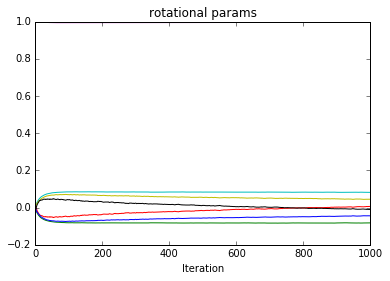

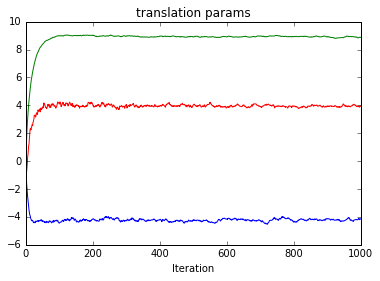

Best trial: 0
-0.138579264627 -0.138703625399
[[  9.96616136e-01  -8.21118690e-02   3.73063627e-03  -4.22305890e+00]
 [  8.18543474e-02   9.95581312e-01   4.60186500e-02   8.83973408e+00]
 [ -7.49282911e-03  -4.55575603e-02   9.98933615e-01   3.88671904e+00]]


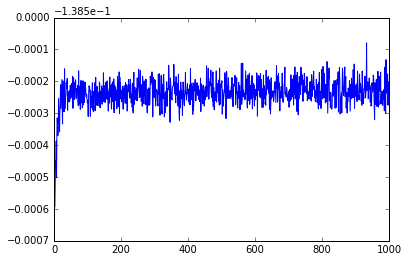

In [162]:
Ts = np.array(aligner.Ts)

plt.plot(Ts[:, [0,1,2,4,5,6,8,9,10]]);
plt.title('rotational params');
plt.xlabel('Iteration');
plt.show();

plt.plot(Ts[:, [3,7,11]]);
plt.title('translation params');
plt.xlabel('Iteration');
plt.show();

best_trial = np.argsort([np.max(scores) for scores in scores_all_trials])[-1]
# best_trial = 1
T = T_all_trials[best_trial]
scores = scores_all_trials[best_trial]
print 'Best trial:', best_trial
print max(scores), scores[-1]

print T.reshape((3,4))
plt.figure();
plt.plot(scores);
plt.show();

In [163]:
local_transform_parameters = {
    'parameters': T_all_trials[best_trial],
    'centroid_m': aligner.centroid_m,
    'centroid_f': aligner.centroid_f,
    'domain_m_origin_wrt_wholebrain': local_aligner_parameters['volume_moving_origin_wrt_wholebrain'],
    'domain_f_origin_wrt_wholebrain': local_aligner_parameters['volume_fixed_origin_wrt_wholebrain']
}

In [164]:
DataManager.save_alignment_results_v2(transform_parameters=local_transform_parameters,
                       score_traj=scores_all_trials[best_trial],
                       parameter_traj=traj_all_trials[best_trial],
                      alignment_spec=local_alignment_spec)

aws s3 cp "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_7N/atlasV5_down32_scoreVolume_7N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_7N_parameters.json" "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_7N/atlasV5_down32_scoreVolume_7N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_7N_parameters.json"
aws s3 cp "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_7N/atlasV5_down32_scoreVolume_7N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_7N_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_7N/atlasV5_down32_scoreVolume_7N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_7N_scoreHistory.bp"
aws s3 c

In [134]:
volume, bbox_wrt_wholebrain = \
DataManager.load_original_volume_all_known_structures_v2(stack='atlasV5', sided=True, 
                                                              volume_type='score', 
                                                              include_surround=True,
                                                                return_label_mappings=False, 
                                                                 name_or_index_as_key='name',
                                                                 common_shape=False,
                                                                in_bbox_wrt='atlasSpace',
                                                                out_bbox_wrt='atlasSpace',
                                                                structures=[structure_m])[structure_m]

global_transform_parameters = DataManager.load_alignment_parameters_v3(alignment_spec=global_alignment_spec)
local_transform_parameters = DataManager.load_alignment_parameters_v3(alignment_spec=local_alignment_spec)

T = compose_alignment_parameters([global_transform_parameters, local_transform_parameters])

transformed_vol, transformed_vol_box_wrt_fixedWholebrain = \
transform_volume_v3(vol=volume, bbox=bbox_wrt_wholebrain, tf_params=T[:3].flatten())

print structure_m, transformed_vol.shape, transformed_vol_box_wrt_fixedWholebrain

DataManager.save_transformed_volume(volume=transformed_vol, 
                                    bbox=transformed_vol_box_wrt_fixedWholebrain, 
                                    alignment_spec=local_alignment_spec, 
                                    resolution=None, 
                                    structure=structure_m)

Prior structure/index map not found. Generating a new one.
Interpolating/filling sparse volume: 0.03 seconds.


7N_L (45, 71, 67) [774 844 417 461 185 251]
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_7N_down32/score_volumes/atlasV5_down32_scoreVolume_7N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_7N_down32_7N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_7N_down32/score_volumes/atlasV5_down32_scoreVolume_7N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_7N_down32_7N_L.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_7N_down32/score_volumes/atlasV5_down32_scoreVolume_7N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_7N_down32_7N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_7N_down32/score_volumes/atlasV5_down32_scoreVo

# Local 2

In [60]:
structure_m = '7N_L'

In [24]:
stack_m_spec = dict(name='atlasV5',
                   vol_type='score',
                   detector_id=None,
                   prep_id=None,
                   structure=structure_m,
                   resolution='down32')

stack_f_spec = dict(name='MD652',
                   vol_type='score',
                   detector_id=13,
                   prep_id=2,
                   structure=convert_to_original_name(structure_m),
                   resolution='down32')

local_alignment_spec = dict(stack_m=stack_m_spec, 
                      stack_f=stack_f_spec,
                      warp_setting=27)

In [29]:
local_aligner_parameters = generate_aligner_parameters(alignment_spec=local_alignment_spec,
structures_m=[structure_m]
)

upstream_warp_id                                                               None
transform_type                                                                rigid
terminate_thresh                                                                NaN
grad_computation_sample_number                                                10000
grid_search_sample_number                                                       NaN
std_tx_um                                                                       NaN
std_ty_um                                                                       NaN
std_tz_um                                                                       NaN
std_theta_xy_degree                                                             NaN
surround_weight                                                             inverse
regularization_weight                                                             0
comment                           local reg with surr with global transform 

Prior structure/index map not found. Generating a new one.
Loaded moving volumes: ['7N_L', '7N_L_surround_200'].
Prior structure/index map not found. Generating a new one.


rm -rf "/home/yuncong/CSHL_volumes/MD652/MD652_prep2_detector13_down32_scoreVolume/score_volumes/MD652_prep2_detector13_down32_scoreVolume_7N_surround_200.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD652/MD652_prep2_detector13_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD652/MD652_prep2_detector13_down32_scoreVolume/score_volumes/MD652_prep2_detector13_down32_scoreVolume_7N_surround_200.bp" "/home/yuncong/CSHL_volumes/MD652/MD652_prep2_detector13_down32_scoreVolume/score_volumes/MD652_prep2_detector13_down32_scoreVolume_7N_surround_200.bp"


File does not exist: /home/yuncong/CSHL_volumes/MD652/MD652_prep2_detector13_down32_scoreVolume/score_volumes/MD652_prep2_detector13_down32_scoreVolume_7N_surround_200.bp
Error loading score volume for 7N_surround_200: [Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/MD652/MD652_prep2_detector13_down32_scoreVolume/score_volumes/MD652_prep2_detector13_down32_scoreVolume_7N_surround_200.bp'.
Loaded fixed volumes: ['7N'].
Computing structure sizes: 1.87 s


In [30]:
global_alignment_stack_m_spec = dict(name='atlasV5',
                   vol_type='score',
                   detector_id=None,
                   prep_id=None,
                   structure=None,
                   resolution='down32')
global_alignment_stack_f_spec = dict(name='MD652',
                   vol_type='score',
                   detector_id=13,
                   prep_id=2,
                   structure=None,
                   resolution='down32')
global_alignment_spec = dict(stack_m=global_alignment_stack_m_spec, 
                      stack_f=global_alignment_stack_f_spec,
                      warp_setting=20)

In [31]:
global_transform_parameters = DataManager.load_alignment_parameters_v3(global_alignment_spec)

In [32]:
volume_fixed = local_aligner_parameters['volume_fixed']
volume_moving = local_aligner_parameters['volume_moving']

In [33]:
init_shift_wrt_movingvol = get_centroid_3d(volume_moving[local_aligner_parameters['structure_to_label_moving'][structure_m]])
init_shift_wrt_fixedvol = transform_points_by_transform_parameters(pts=[init_shift_wrt_movingvol + global_transform_parameters['domain_m_origin_wrt_wholebrain']],
transform_parameters=global_transform_parameters)[0] - global_transform_parameters['domain_f_origin_wrt_wholebrain']

print init_shift_wrt_movingvol, init_shift_wrt_fixedvol

[ 225.97802909  321.25684995  127.02230353] [ 328.16261255  310.51265902  117.27699805]


In [35]:
# initial_shift_wrt_fixedvol = initial_shift_wrt_movingvol + local_aligner_parameters['volume_moving_origin_wrt_wholebrain'] - local_aligner_parameters['volume_fixed_origin_wrt_wholebrain']
# print initial_shift_wrt_movingvol, initial_shift_wrt_fixedvol

In [36]:
aligner = Aligner4(volume_fixed, volume_moving, labelIndexMap_m2f=local_aligner_parameters['label_mapping_m2f'])
aligner.set_centroid(centroid_m=init_shift_wrt_movingvol, 
                     centroid_f=init_shift_wrt_fixedvol)
# aligner.set_centroid(centroid_m=np.zeros((3,)), 
#                      centroid_f=np.zeros((3,)))
aligner.set_label_weights(label_weights=local_aligner_parameters['label_weights_m'])

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 225.97802909  321.25684995  127.02230353], centroid_f: [ 328.16261255  310.51265902  117.27699805]


In [37]:
gradients_f = compute_gradient(volume_fixed, smooth_first=True)
aligner.load_gradient(gradients=gradients_f) # 120s-170 = 2 mins; all 28, 220s

indices_f: set([1])


In [ ]:
init_T = transform_parameters_to_init_T(global_transform_parameters, local_aligner_parameters,
                                   centroid_m=init_shift_wrt_movingvol, 
                                    centroid_f=init_shift_wrt_fixedvol)
print 'init_T', init_T

In [38]:
# Tuning learning rate:
# lr1=10., if lucky converges much faster than lr1=1., but sometimes stuck in local maxima
# If lr1=1., grad_computation_sample_number=1e5 is sufficient.

trial_num = 1

T_all_trials = []
scores_all_trials = []
traj_all_trials = []

for _ in range(trial_num):

    try:
        T, scores = aligner.optimize(tf_type=local_aligner_parameters['transform_type'], 
                                     max_iter_num=1000,
                                     history_len=20, 
                                     terminate_thresh_rot=.001,
                                     terminate_thresh_trans=.01,
                                     grad_computation_sample_number=local_aligner_parameters['grad_computation_sample_number'],
                                     lr1=1, lr2=.01,
                                     init_T=init_T.flatten()
                                    )
        T_all_trials.append(T)
        scores_all_trials.append(scores)
        traj_all_trials.append(aligner.Ts)
        
    except Exception as e:
        sys.stderr.write('%s\n' % e)


iteration 0
Norm of gradient = 2.449490
around x=-6.09; around y=-2.05; around z=-28.61
step: 0.03 seconds
current score: -0.208817
new_T: [ 0.98996692  0.99993333 -1.00996642]
det: 1.02

iteration 1
Norm of gradient = 1.351421
around x=-6.39; around y=-2.01; around z=-28.16
step: 0.03 seconds
current score: -0.208762
new_T: [ 1.45710177  1.68406718 -1.34746453]
det: 1.02

iteration 2
Norm of gradient = 1.155096
around x=-6.65; around y=-1.93; around z=-27.84
step: 0.03 seconds
current score: -0.208765
new_T: [ 1.95879028  2.21430031 -1.7094952 ]
det: 1.02

iteration 3
Norm of gradient = 0.914436
around x=-6.85; around y=-1.89; around z=-27.56
step: 0.03 seconds
current score: -0.208771
new_T: [ 2.34190964  2.66602909 -1.92970581]
det: 1.02

iteration 4
Norm of gradient = 0.682537
around x=-6.97; around y=-1.95; around z=-27.28
step: 0.03 seconds
current score: -0.208676
new_T: [ 2.49036522  3.06183217 -1.85975925]
det: 1.02

iteration 5
Norm of gradient = 0.705401
around x=-7.14; aro

Norm of gradient = 0.178631
around x=-8.97; around y=-3.24; around z=-23.38
step: 0.03 seconds
current score: -0.208646
new_T: [-0.35872614  8.41507076 -2.6993966 ]
det: 1.02

iteration 46
Norm of gradient = 0.152061
around x=-8.98; around y=-3.26; around z=-23.35
step: 0.03 seconds
current score: -0.208625
new_T: [-0.28507834  8.48788068 -2.61636747]
det: 1.02

iteration 47
Norm of gradient = 0.090176
around x=-9.00; around y=-3.27; around z=-23.31
step: 0.03 seconds
current score: -0.208627
new_T: [-0.32817248  8.53168914 -2.62881137]
det: 1.02

iteration 48
Norm of gradient = 0.284152
around x=-8.97; around y=-3.34; around z=-23.29
step: 0.03 seconds
current score: -0.208604
new_T: [-0.53599194  8.52987377 -2.52277498]
det: 1.02

iteration 49
Norm of gradient = 0.315120
around x=-9.03; around y=-3.29; around z=-23.25
step: 0.03 seconds
current score: -0.208585
new_T: [-0.60998629  8.58082118 -2.74814972]
det: 1.02

iteration 50
Norm of gradient = 0.122225
around x=-9.02; around y=-3

Norm of gradient = 0.135216
around x=-9.34; around y=-3.79; around z=-22.30
step: 0.03 seconds
current score: -0.208654
new_T: [-2.26618119  9.80360374 -2.58568775]
det: 1.02

iteration 93
Norm of gradient = 0.144056
around x=-9.31; around y=-3.83; around z=-22.30
step: 0.03 seconds
current score: -0.208655
new_T: [-2.28930178  9.80150753 -2.48611466]
det: 1.02

iteration 94
Norm of gradient = 0.166985
around x=-9.34; around y=-3.79; around z=-22.28
step: 0.03 seconds
current score: -0.208686
new_T: [-2.22524357  9.84328753 -2.57724961]
det: 1.02

iteration 95
Norm of gradient = 0.073344
around x=-9.34; around y=-3.81; around z=-22.27
step: 0.03 seconds
current score: -0.208617
new_T: [-2.2040001   9.87517782 -2.532416  ]
det: 1.02

iteration 96
Norm of gradient = 0.139439
around x=-9.32; around y=-3.84; around z=-22.25
step: 0.03 seconds
current score: -0.208644
new_T: [-2.2909893   9.88201433 -2.47084158]
det: 1.02

iteration 97
Norm of gradient = 0.180118
around x=-9.31; around y=-3

Norm of gradient = 0.023028
around x=-9.29; around y=-3.89; around z=-22.04
step: 0.03 seconds
current score: -0.208660
new_T: [ -2.59315897  10.18582249  -2.37845593]
det: 1.02

iteration 140
Norm of gradient = 0.185197
around x=-9.31; around y=-3.86; around z=-22.02
step: 0.03 seconds
current score: -0.208603
new_T: [ -2.71392283  10.16991318  -2.49824936]
det: 1.02

iteration 141
Norm of gradient = 0.075684
around x=-9.30; around y=-3.87; around z=-22.03
step: 0.03 seconds
current score: -0.208638
new_T: [ -2.67233233  10.1784014   -2.44751336]
det: 1.02

iteration 142
Norm of gradient = 0.056034
around x=-9.30; around y=-3.88; around z=-22.01
step: 0.03 seconds
current score: -0.208612
new_T: [ -2.70485666  10.19553828  -2.42534524]
det: 1.02

iteration 143
Norm of gradient = 0.089087
around x=-9.31; around y=-3.86; around z=-22.01
step: 0.03 seconds
current score: -0.208682
new_T: [ -2.67531509  10.20483468  -2.48055233]
det: 1.02

iteration 144
Norm of gradient = 0.187027
around 

Norm of gradient = 0.112371
around x=-9.26; around y=-3.90; around z=-21.79
step: 0.03 seconds
current score: -0.208568
new_T: [ -3.13182802  10.46630506  -2.42470675]
det: 1.02

iteration 187
Norm of gradient = 0.062230
around x=-9.27; around y=-3.88; around z=-21.79
step: 0.03 seconds
current score: -0.208631
new_T: [ -3.12387558  10.45765357  -2.46627709]
det: 1.02

iteration 188
Norm of gradient = 0.187937
around x=-9.30; around y=-3.82; around z=-21.80
step: 0.03 seconds
current score: -0.208651
new_T: [ -3.07567183  10.45597137  -2.58998829]
det: 1.02

iteration 189
Norm of gradient = 0.157700
around x=-9.33; around y=-3.79; around z=-21.79
step: 0.03 seconds
current score: -0.208673
new_T: [ -3.02953099  10.48696826  -2.68166145]
det: 1.02

iteration 190
Norm of gradient = 0.144807
around x=-9.30; around y=-3.82; around z=-21.79
step: 0.03 seconds
current score: -0.208633
new_T: [ -3.04290506  10.48161134  -2.58220383]
det: 1.02

iteration 191
Norm of gradient = 0.027633
around 

Norm of gradient = 0.060818
around x=-9.16; around y=-3.79; around z=-21.73
step: 0.03 seconds
current score: -0.208671
new_T: [ -3.06028341  10.58724823  -2.41036153]
det: 1.02

iteration 235
Norm of gradient = 0.250705
around x=-9.21; around y=-3.73; around z=-21.72
step: 0.03 seconds
current score: -0.208619
new_T: [ -3.01429911  10.61692017  -2.57083701]
det: 1.02

iteration 236
Norm of gradient = 0.131579
around x=-9.23; around y=-3.70; around z=-21.71
step: 0.03 seconds
current score: -0.208584
new_T: [ -3.01823601  10.61475275  -2.66625941]
det: 1.02

iteration 237
Norm of gradient = 0.094773
around x=-9.23; around y=-3.68; around z=-21.72
step: 0.03 seconds
current score: -0.208604
new_T: [ -2.93267652  10.61773447  -2.67462272]
det: 1.02

iteration 238
Norm of gradient = 0.051798
around x=-9.21; around y=-3.68; around z=-21.74
step: 0.03 seconds
current score: -0.208635
new_T: [ -2.94153359  10.58962255  -2.66530537]
det: 1.02

iteration 239
Norm of gradient = 0.145609
around 

Norm of gradient = 0.149320
around x=-9.03; around y=-3.70; around z=-21.73
step: 0.03 seconds
current score: -0.208661
new_T: [ -3.25680091  10.5471279   -2.48599948]
det: 1.02

iteration 283
Norm of gradient = 0.093458
around x=-9.03; around y=-3.68; around z=-21.73
step: 0.03 seconds
current score: -0.208628
new_T: [ -3.18003794  10.56243507  -2.5068231 ]
det: 1.02

iteration 284
Norm of gradient = 0.134098
around x=-9.05; around y=-3.64; around z=-21.74
step: 0.03 seconds
current score: -0.208593
new_T: [ -3.16224818  10.54489466  -2.59896204]
det: 1.02

iteration 285
Norm of gradient = 0.082898
around x=-9.04; around y=-3.63; around z=-21.75
step: 0.03 seconds
current score: -0.208635
new_T: [ -3.086358    10.55196402  -2.57560076]
det: 1.02

iteration 286
Norm of gradient = 0.023149
around x=-9.04; around y=-3.63; around z=-21.74
step: 0.03 seconds
current score: -0.208640
new_T: [ -3.0975385   10.56366661  -2.57421939]
det: 1.02

iteration 287
Norm of gradient = 0.188353
around 

Norm of gradient = 0.050181
around x=-8.99; around y=-3.51; around z=-21.71
step: 0.03 seconds
current score: -0.208697
new_T: [ -3.2039756   10.59344699  -2.74526575]
det: 1.02

iteration 331
Norm of gradient = 0.260707
around x=-8.93; around y=-3.57; around z=-21.71
step: 0.03 seconds
current score: -0.208630
new_T: [ -3.26319456  10.58352352  -2.58042354]
det: 1.02

iteration 332
Norm of gradient = 0.093207
around x=-8.95; around y=-3.55; around z=-21.71
step: 0.03 seconds
current score: -0.208599
new_T: [ -3.24995222  10.59551968  -2.64123835]
det: 1.02

iteration 333
Norm of gradient = 0.070869
around x=-8.95; around y=-3.56; around z=-21.69
step: 0.03 seconds
current score: -0.208604
new_T: [ -3.20534223  10.6285171   -2.60637973]
det: 1.02

iteration 334
Norm of gradient = 0.032335
around x=-8.95; around y=-3.55; around z=-21.70
step: 0.03 seconds
current score: -0.208583
new_T: [ -3.22953835  10.6196234   -2.62243766]
det: 1.02

iteration 335
Norm of gradient = 0.160397
around 

Norm of gradient = 0.021204
around x=-8.72; around y=-3.50; around z=-21.81
step: 0.03 seconds
current score: -0.208592
new_T: [ -3.11553014  10.47470768  -2.44930889]
det: 1.02

iteration 379
Norm of gradient = 0.052227
around x=-8.73; around y=-3.49; around z=-21.81
step: 0.03 seconds
current score: -0.208662
new_T: [ -3.08190489  10.48562951  -2.47013778]
det: 1.02

iteration 380
Norm of gradient = 0.073750
around x=-8.74; around y=-3.47; around z=-21.81
step: 0.03 seconds
current score: -0.208617
new_T: [ -3.0913494   10.48373873  -2.52185069]
det: 1.02

iteration 381
Norm of gradient = 0.058517
around x=-8.75; around y=-3.47; around z=-21.79
step: 0.03 seconds
current score: -0.208657
new_T: [ -3.13502148  10.49834822  -2.53821051]
det: 1.02

iteration 382
Norm of gradient = 0.051361
around x=-8.76; around y=-3.46; around z=-21.78
step: 0.03 seconds
current score: -0.208652
new_T: [ -3.12420233  10.50887883  -2.56801944]
det: 1.02

iteration 383
Norm of gradient = 0.137410
around 

Norm of gradient = 0.080931
around x=-8.68; around y=-3.36; around z=-21.77
step: 0.03 seconds
current score: -0.208590
new_T: [ -3.19486412  10.52706478  -2.63766022]
det: 1.02

iteration 426
Norm of gradient = 0.069181
around x=-8.68; around y=-3.36; around z=-21.77
step: 0.03 seconds
current score: -0.208617
new_T: [ -3.12920157  10.53888281  -2.63600242]
det: 1.02

iteration 427
Norm of gradient = 0.059128
around x=-8.66; around y=-3.37; around z=-21.78
step: 0.03 seconds
current score: -0.208602
new_T: [ -3.15158927  10.5207891   -2.61203372]
det: 1.02

iteration 428
Norm of gradient = 0.068518
around x=-8.65; around y=-3.35; around z=-21.80
step: 0.03 seconds
current score: -0.208622
new_T: [ -3.09914904  10.50527562  -2.60516444]
det: 1.02

iteration 429
Norm of gradient = 0.087149
around x=-8.63; around y=-3.37; around z=-21.80
step: 0.03 seconds
current score: -0.208649
new_T: [ -3.09918905  10.50682766  -2.54705115]
det: 1.02

iteration 430
Norm of gradient = 0.038525
around 

Norm of gradient = 0.132617
around x=-8.55; around y=-3.22; around z=-21.84
step: 0.03 seconds
current score: -0.208594
new_T: [ -3.05517439  10.44834651  -2.70489047]
det: 1.02

iteration 474
Norm of gradient = 0.024457
around x=-8.55; around y=-3.22; around z=-21.84
step: 0.03 seconds
current score: -0.208642
new_T: [ -3.04218908  10.46364496  -2.70718989]
det: 1.02

iteration 475
Norm of gradient = 0.061925
around x=-8.55; around y=-3.22; around z=-21.83
step: 0.03 seconds
current score: -0.208637
new_T: [ -2.99096824  10.49269883  -2.6941367 ]
det: 1.02

iteration 476
Norm of gradient = 0.051737
around x=-8.54; around y=-3.21; around z=-21.85
step: 0.03 seconds
current score: -0.208643
new_T: [ -2.9582269   10.47437661  -2.68975166]
det: 1.02

iteration 477
Norm of gradient = 0.045121
around x=-8.55; around y=-3.20; around z=-21.84
step: 0.03 seconds
current score: -0.208589
new_T: [ -2.95431751  10.48557301  -2.71539041]
det: 1.02

iteration 478
Norm of gradient = 0.040881
around 

Norm of gradient = 0.035618
around x=-8.43; around y=-3.19; around z=-21.79
step: 0.04 seconds
current score: -0.208659
new_T: [ -3.10853966  10.53655551  -2.62835315]
det: 1.02

iteration 522
Norm of gradient = 0.050549
around x=-8.42; around y=-3.20; around z=-21.78
step: 0.03 seconds
current score: -0.208634
new_T: [ -3.14052613  10.53946224  -2.60965843]
det: 1.02

iteration 523
Norm of gradient = 0.041018
around x=-8.43; around y=-3.20; around z=-21.77
step: 0.03 seconds
current score: -0.208618
new_T: [ -3.11268042  10.5587556   -2.61558407]
det: 1.02

iteration 524
Norm of gradient = 0.026329
around x=-8.44; around y=-3.19; around z=-21.77
step: 0.03 seconds
current score: -0.208610
new_T: [ -3.10558859  10.57144705  -2.6258012 ]
det: 1.02

iteration 525
Norm of gradient = 0.041122
around x=-8.44; around y=-3.18; around z=-21.77
step: 0.03 seconds
current score: -0.208660
new_T: [ -3.07711219  10.57679376  -2.64116633]
det: 1.02

iteration 526
Norm of gradient = 0.068633
around 

Norm of gradient = 0.047986
around x=-8.28; around y=-3.09; around z=-21.87
step: 0.03 seconds
current score: -0.208654
new_T: [ -3.00456828  10.44737585  -2.58188959]
det: 1.02

iteration 570
Norm of gradient = 0.077266
around x=-8.30; around y=-3.08; around z=-21.86
step: 0.03 seconds
current score: -0.208614
new_T: [ -3.01256781  10.46240517  -2.62867083]
det: 1.02

iteration 571
Norm of gradient = 0.069428
around x=-8.29; around y=-3.08; around z=-21.86
step: 0.03 seconds
current score: -0.208586
new_T: [ -2.95103604  10.48306772  -2.60527289]
det: 1.02

iteration 572
Norm of gradient = 0.037600
around x=-8.28; around y=-3.08; around z=-21.87
step: 0.03 seconds
current score: -0.208640
new_T: [ -2.96795788  10.47035175  -2.59102754]
det: 1.02

iteration 573
Norm of gradient = 0.014393
around x=-8.28; around y=-3.08; around z=-21.87
step: 0.03 seconds
current score: -0.208671
new_T: [ -2.96757767  10.46397082  -2.60012561]
det: 1.02

iteration 574
Norm of gradient = 0.018819
around 

Norm of gradient = 0.077478
around x=-8.18; around y=-3.07; around z=-21.80
step: 0.03 seconds
current score: -0.208638
new_T: [ -3.14833962  10.54598963  -2.50193865]
det: 1.02

iteration 618
Norm of gradient = 0.128714
around x=-8.21; around y=-3.04; around z=-21.81
step: 0.03 seconds
current score: -0.208631
new_T: [ -3.11440643  10.53821143  -2.58087786]
det: 1.02

iteration 619
Norm of gradient = 0.103110
around x=-8.22; around y=-3.02; around z=-21.81
step: 0.03 seconds
current score: -0.208625
new_T: [ -3.03219444  10.56488463  -2.60148817]
det: 1.02

iteration 620
Norm of gradient = 0.071530
around x=-8.20; around y=-3.03; around z=-21.81
step: 0.03 seconds
current score: -0.208706
new_T: [ -3.00769253  10.56867296  -2.55533887]
det: 1.02

iteration 621
Norm of gradient = 0.081970
around x=-8.22; around y=-3.01; around z=-21.81
step: 0.03 seconds
current score: -0.208647
new_T: [ -3.01359308  10.55912673  -2.61186511]
det: 1.02

iteration 622
Norm of gradient = 0.128711
around 

Norm of gradient = 0.031520
around x=-8.18; around y=-2.89; around z=-21.80
step: 0.03 seconds
current score: -0.208680
new_T: [ -3.11703415  10.53712553  -2.78405636]
det: 1.02

iteration 663
Norm of gradient = 0.120585
around x=-8.15; around y=-2.92; around z=-21.79
step: 0.03 seconds
current score: -0.208643
new_T: [ -3.14844426  10.54456291  -2.71231523]
det: 1.02

iteration 664
Norm of gradient = 0.066911
around x=-8.16; around y=-2.92; around z=-21.79
step: 0.03 seconds
current score: -0.208666
new_T: [ -3.09000505  10.57124396  -2.70933548]
det: 1.02

iteration 665
Norm of gradient = 0.077019
around x=-8.17; around y=-2.92; around z=-21.77
step: 0.03 seconds
current score: -0.208651
new_T: [ -3.14942374  10.58220462  -2.7349936 ]
det: 1.02

iteration 666
Norm of gradient = 0.085283
around x=-8.15; around y=-2.93; around z=-21.77
step: 0.03 seconds
current score: -0.208628
new_T: [ -3.12790117  10.5854729   -2.67956047]
det: 1.02

iteration 667
Norm of gradient = 0.037994
around 

Norm of gradient = 0.098897
around x=-8.12; around y=-2.84; around z=-21.74
step: 0.03 seconds
current score: -0.208632
new_T: [ -3.33204345  10.58155539  -2.86006801]
det: 1.02

iteration 709
Norm of gradient = 0.067348
around x=-8.13; around y=-2.82; around z=-21.73
step: 0.03 seconds
current score: -0.208592
new_T: [ -3.29658489  10.59953116  -2.88866408]
det: 1.02

iteration 710
Norm of gradient = 0.096006
around x=-8.11; around y=-2.84; around z=-21.73
step: 0.03 seconds
current score: -0.208608
new_T: [ -3.307235    10.61006716  -2.82637297]
det: 1.02

iteration 711
Norm of gradient = 0.056916
around x=-8.11; around y=-2.84; around z=-21.74
step: 0.03 seconds
current score: -0.208634
new_T: [ -3.25510019  10.61184528  -2.81958057]
det: 1.02

iteration 712
Norm of gradient = 0.054399
around x=-8.10; around y=-2.85; around z=-21.73
step: 0.03 seconds
current score: -0.208637
new_T: [ -3.25928504  10.61983203  -2.78522466]
det: 1.02

iteration 713
Norm of gradient = 0.088782
around 

Norm of gradient = 0.044303
around x=-7.90; around y=-2.83; around z=-21.83
step: 0.03 seconds
current score: -0.208609
new_T: [ -3.01124417  10.56523265  -2.51158175]
det: 1.02

iteration 757
Norm of gradient = 0.058373
around x=-7.91; around y=-2.82; around z=-21.81
step: 0.03 seconds
current score: -0.208605
new_T: [ -3.0100053   10.59423612  -2.53358478]
det: 1.02

iteration 758
Norm of gradient = 0.071951
around x=-7.92; around y=-2.81; around z=-21.81
step: 0.03 seconds
current score: -0.208653
new_T: [ -2.9556275   10.61828398  -2.55053918]
det: 1.02

iteration 759
Norm of gradient = 0.080646
around x=-7.93; around y=-2.79; around z=-21.81
step: 0.03 seconds
current score: -0.208660
new_T: [ -2.94538388  10.60728734  -2.60364605]
det: 1.02

iteration 760
Norm of gradient = 0.086231
around x=-7.91; around y=-2.81; around z=-21.81
step: 0.03 seconds
current score: -0.208570
new_T: [ -2.98640238  10.59386444  -2.56259274]
det: 1.02

iteration 761
Norm of gradient = 0.024770
around 

Norm of gradient = 0.088405
around x=-7.90; around y=-2.71; around z=-21.76
step: 0.03 seconds
current score: -0.208632
new_T: [ -3.19739905  10.59059458  -2.76942091]
det: 1.02

iteration 805
Norm of gradient = 0.069165
around x=-7.88; around y=-2.72; around z=-21.78
step: 0.03 seconds
current score: -0.208575
new_T: [ -3.17572777  10.57481722  -2.73313297]
det: 1.02

iteration 806
Norm of gradient = 0.027112
around x=-7.88; around y=-2.71; around z=-21.79
step: 0.03 seconds
current score: -0.208670
new_T: [ -3.18076486  10.55806926  -2.73380947]
det: 1.02

iteration 807
Norm of gradient = 0.055492
around x=-7.89; around y=-2.70; around z=-21.78
step: 0.03 seconds
current score: -0.208617
new_T: [ -3.17560488  10.56483936  -2.7695071 ]
det: 1.02

iteration 808
Norm of gradient = 0.032221
around x=-7.89; around y=-2.70; around z=-21.78
step: 0.03 seconds
current score: -0.208665
new_T: [ -3.19438533  10.56217706  -2.78964155]
det: 1.02

iteration 809
Norm of gradient = 0.046657
around 

Norm of gradient = 0.111325
around x=-7.82; around y=-2.61; around z=-21.80
step: 0.03 seconds
current score: -0.208641
new_T: [ -3.03900398  10.60446346  -2.79624639]
det: 1.02

iteration 853
Norm of gradient = 0.029920
around x=-7.82; around y=-2.60; around z=-21.81
step: 0.03 seconds
current score: -0.208569
new_T: [ -3.01901798  10.59659362  -2.79700316]
det: 1.02

iteration 854
Norm of gradient = 0.091059
around x=-7.83; around y=-2.58; around z=-21.80
step: 0.03 seconds
current score: -0.208697
new_T: [ -2.96761757  10.62515355  -2.83207903]
det: 1.02

iteration 855
Norm of gradient = 0.047428
around x=-7.84; around y=-2.58; around z=-21.80
step: 0.03 seconds
current score: -0.208668
new_T: [ -3.00593245  10.62086096  -2.85422544]
det: 1.02

iteration 856
Norm of gradient = 0.035325
around x=-7.84; around y=-2.58; around z=-21.79
step: 0.03 seconds
current score: -0.208666
new_T: [ -2.97754055  10.6370589   -2.85632582]
det: 1.02

iteration 857
Norm of gradient = 0.101142
around 

Norm of gradient = 0.090702
around x=-7.74; around y=-2.56; around z=-21.76
step: 0.03 seconds
current score: -0.208631
new_T: [ -3.09158369  10.65785937  -2.77845476]
det: 1.02

iteration 901
Norm of gradient = 0.029210
around x=-7.73; around y=-2.56; around z=-21.76
step: 0.03 seconds
current score: -0.208664
new_T: [ -3.09336684  10.66395741  -2.76038502]
det: 1.02

iteration 902
Norm of gradient = 0.031543
around x=-7.72; around y=-2.57; around z=-21.76
step: 0.03 seconds
current score: -0.208651
new_T: [ -3.10124812  10.65358521  -2.7457876 ]
det: 1.02

iteration 903
Norm of gradient = 0.051011
around x=-7.73; around y=-2.55; around z=-21.76
step: 0.03 seconds
current score: -0.208630
new_T: [ -3.07843974  10.66919731  -2.76867284]
det: 1.02

iteration 904
Norm of gradient = 0.041458
around x=-7.73; around y=-2.55; around z=-21.76
step: 0.03 seconds
current score: -0.208657
new_T: [ -3.04004011  10.67251041  -2.76395621]
det: 1.02

iteration 905
Norm of gradient = 0.052597
around 

Norm of gradient = 0.108174
around x=-7.63; around y=-2.45; around z=-21.86
step: 0.03 seconds
current score: -0.208688
new_T: [ -3.01466271  10.5228726   -2.83809922]
det: 1.02

iteration 949
Norm of gradient = 0.059843
around x=-7.64; around y=-2.45; around z=-21.84
step: 0.03 seconds
current score: -0.208620
new_T: [ -3.04594038  10.54766053  -2.8530555 ]
det: 1.02

iteration 950
Norm of gradient = 0.054281
around x=-7.65; around y=-2.44; around z=-21.84
step: 0.03 seconds
current score: -0.208654
new_T: [ -3.05800247  10.53602184  -2.89014695]
det: 1.02

iteration 951
Norm of gradient = 0.038833
around x=-7.64; around y=-2.44; around z=-21.84
step: 0.03 seconds
current score: -0.208638
new_T: [ -3.03405977  10.55195036  -2.87011601]
det: 1.02

iteration 952
Norm of gradient = 0.039595
around x=-7.64; around y=-2.45; around z=-21.83
step: 0.03 seconds
current score: -0.208656
new_T: [ -3.03259311  10.57131663  -2.84868097]
det: 1.02

iteration 953
Norm of gradient = 0.052513
around 

Norm of gradient = 0.044769
around x=-7.52; around y=-2.41; around z=-21.87
step: 0.03 seconds
current score: -0.208585
new_T: [ -3.10220585  10.48605043  -2.80141592]
det: 1.02

iteration 996
Norm of gradient = 0.064164
around x=-7.54; around y=-2.39; around z=-21.86
step: 0.03 seconds
current score: -0.208573
new_T: [ -3.10414606  10.4992465   -2.83886091]
det: 1.02

iteration 997
Norm of gradient = 0.043368
around x=-7.53; around y=-2.40; around z=-21.86
step: 0.03 seconds
current score: -0.208616
new_T: [ -3.10223427  10.50234317  -2.81083629]
det: 1.02

iteration 998
Norm of gradient = 0.032274
around x=-7.53; around y=-2.39; around z=-21.87
step: 0.03 seconds
current score: -0.208661
new_T: [ -3.08782641  10.49417     -2.82399607]
det: 1.02

iteration 999
Norm of gradient = 0.026947
around x=-7.52; around y=-2.39; around z=-21.86
step: 0.03 seconds
current score: -0.208672
new_T: [ -3.07425866  10.50623505  -2.8098062 ]
det: 1.02


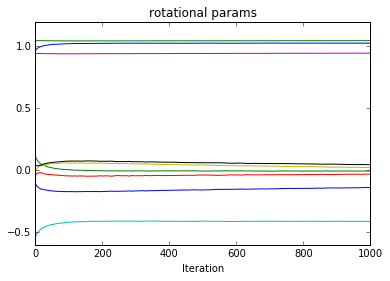

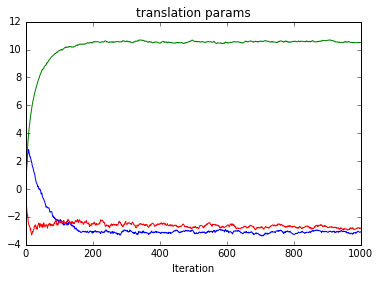

Best trial: 0
-0.208521311911 -0.208671567292
[[  1.02632546e+00  -5.18656471e-03  -3.62035112e-02  -3.16426073e+00]
 [ -4.10012428e-01   9.43981217e-01   3.49263253e-02   1.05713169e+01]
 [  5.65777171e-02  -1.49245523e-01   1.04573219e+00  -2.66762640e+00]]


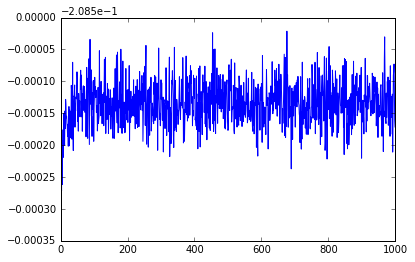

In [39]:
Ts = np.array(aligner.Ts)

plt.plot(Ts[:, [0,1,2,4,5,6,8,9,10]]);
plt.title('rotational params');
plt.xlabel('Iteration');
plt.show();

plt.plot(Ts[:, [3,7,11]]);
plt.title('translation params');
plt.xlabel('Iteration');
plt.show();

best_trial = np.argsort([np.max(scores) for scores in scores_all_trials])[-1]
# best_trial = 1
T = T_all_trials[best_trial]
scores = scores_all_trials[best_trial]
print 'Best trial:', best_trial
print max(scores), scores[-1]

print T.reshape((3,4))
plt.figure();
plt.plot(scores);
plt.show();

In [40]:
transform_parameters = {
    'parameters': T_all_trials[best_trial],
    'centroid_m': aligner.centroid_m,
    'centroid_f': aligner.centroid_f,
    'domain_m_origin_wrt_wholebrain': local_aligner_parameters['volume_moving_origin_wrt_wholebrain'],
    'domain_f_origin_wrt_wholebrain': local_aligner_parameters['volume_fixed_origin_wrt_wholebrain']
}

In [41]:
DataManager.save_alignment_results_v2(transform_parameters=transform_parameters,
                       score_traj=scores_all_trials[best_trial],
                       parameter_traj=traj_all_trials[best_trial],
                      alignment_spec=local_alignment_spec)

aws s3 cp "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N_parameters.json" "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N_parameters.json"
aws s3 cp "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N_scoreHistory.bp"
aws s3 c

In [42]:
volume_moving_tuples = \
        DataManager.load_original_volume_all_known_structures_v2(stack='atlasV5', sided=True, 
                                                              volume_type='score', 
                                                              include_surround=True,
                                                                return_label_mappings=False, 
                                                                 name_or_index_as_key='name',
                                                                 common_shape=False,
                                                                in_bbox_wrt='atlasSpace',
                                                                out_bbox_wrt='atlasSpace',
                                                                structures=['7N_L', '7N_L_surround_200'])

Prior structure/index map not found. Generating a new one.


In [43]:
transform_parameters = DataManager.load_alignment_parameters_v3(alignment_spec=local_alignment_spec)

In [44]:
for name_s, (vol, bbox_wrt_wholebrain) in volume_moving_tuples.iteritems():
#     if convert_to_original_name(name_s) != '7N':
#         continue
    transformed_vol, transformed_vol_box_wrt_fixedWholebrain = transform_volume_by_alignment_parameters(vol, bbox_wrt_wholebrain, transform_parameters=transform_parameters)
    print transformed_vol.shape, transformed_vol_box_wrt_fixedWholebrain
    DataManager.save_transformed_volume(volume=transformed_vol, 
                                        bbox=transformed_vol_box_wrt_fixedWholebrain, 
                                        alignment_spec=local_alignment_spec, 
                                        resolution=None, 
                                        structure=name_s)

Interpolating/filling sparse volume: 0.07 seconds.


(77, 92, 86) [ 919 1010  609  685  192  277]
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N_down32/score_volumes/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N_down32_7N_L_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N_down32/score_volumes/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N_down32_7N_L_surround_200.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N_down32/score_volumes/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N_down32_7N_L_surround_200_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N_dow

Interpolating/filling sparse volume: 0.05 seconds.


(70, 73, 71) [ 928 1000  612  681  198  268]
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N_down32/score_volumes/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N_down32_7N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N_down32/score_volumes/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N_down32_7N_L.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N_down32/score_volumes/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N_down32_7N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp27_MD652_prep2_detector13_down32_scoreVolume_7N_down32/score_volumes/atlasV5_down32_scoreV